In [1]:
# Import main packages
import sys, os
sys.path.insert(1, os.path.abspath('..') )
from ECO import diagnostics as eco
from ECO.utils import config_parser, open_datasets, get_namelist
import xarray as xr
import xgcm
import numpy as np

# Import matplotlib for plotting and functions to override default values
import matplotlib.pyplot as plt
from plot_utils import update_plotstyle, cmap_OB
cmap_OB=cmap_OB(); update_plotstyle()

In [2]:
exp_prefix = ['EXP00','EXP01'] # Import all files with this prefix
exp_suffix = ['_5d50','_5d50']
ds = open_datasets(exp_prefix, exp_suffix, components = ['all'])
if type(ds) != dict: ds={exp_prefix+exp_suffix:ds}

In [3]:
# get base configuration of EXP00
kwargs={}
#kwargs[exp_prefix+exp_suffix] = config_parser(exp_prefix)
for i in range(len(exp_prefix)): kwargs[exp_prefix[i]+exp_suffix[i]] = config_parser(exp_prefix[i])
#for exp in exp_suffix: kwargs[exp_prefix+exp] = config_parser(exp_prefix)
#if kwargs_sim['get_namelist']: kwargs_sim['namelist'] = get_namelist(path = kwargs_proc['path_nemo'])

# define xgcm configuration based on dataset metrics
_metrics = {('X',): ['e1tm', 'e1um', 'e1vm', 'e1fm'],
     ('Y',): ['e2tm', 'e2um', 'e2vm', 'e2fm'],
     ('Z',): ['e3tm', 'e3um', 'e3vm', 'e3wm']}

grid = {exp: xgcm.Grid(ds[exp], metrics=_metrics, periodic=False) for exp in ds} # define xgcm grid
grid_ops = {exp: eco.Grid_ops(grid[exp], maskargs={'mask':'nan'}) for exp in ds} # define gridoperations.
grid = {exp: grid_ops[exp]._update({'Z':ds[exp]['e3tm_1d']}) for exp in ds}
        
properties= {exp: eco.Properties(grid_ops[exp], {'X': ds[exp].glamt, 'Y': ds[exp].gphit, 'Z': ds[exp].depth_1d}, eos_properties=kwargs[exp][2]['eos']) for exp in ds}
energetics= {exp: eco.Energetics(grid_ops[exp], properties[exp]) for exp in ds}

Using processing configuration base.yml
Using processing configuration base.yml


In [2]:
#exp = 'EXP00_5d50'
#path_to_dataset = 'data/'+exp+'/' # Here chosen as relative path, adjust if notebook is executed outside of 
#file_name_proc = exp+'_proc*'       # Import all files with this prefix
#file_name_pre = exp+'_pre*'       # Import all files with this prefix
#ds     = xr.open_mfdataset(path_to_dataset+file_name_proc, decode_times=False, parallel=True, data_vars='minimal', compat='override', coords='minimal') 
#ds_raw = xr.open_mfdataset(path_to_dataset+file_name_pre,  decode_times=False, parallel=True, data_vars='minimal') 

# get configuration from processing for matching parameters
#kwargs_proc, kwargs_pre, kwargs_sim = config_parser(config_path='../ECOprocessing/Configs/'+exp, sub_config='sub_5d50')

#kwargs[exp_prefix+exp_suffix] = config_parser(exp_prefix)
kwargs={}
for i in range(len(exp_prefix)): kwargs[exp_prefix[i]+exp_suffix[i]] = config_parser(exp_prefix[i])
# define xgcm configuration based on dataset metrics
_metrics = {('X',): ['e1tm', 'e1um', 'e1vm', 'e1fm'],
     ('Y',): ['e2tm', 'e2um', 'e2vm', 'e2fm'],
     ('Z',): ['e3tm', 'e3um', 'e3vm', 'e3wm']}

grid = xgcm.Grid(ds, metrics=_metrics, periodic=False) # define xgcm grid
grid_ops = eco.Grid_ops(grid, maskargs={'mask':'nan'}) # define gridoperations. With {'mask':'nan'} operations apply a nan-mask, replacing 0 by nan in data

# define coordinates to pass to diagnostics
_coords = {'X': ds.glamt,
           'Y': ds.gphit, 
           'Z': ds.depth_1d}

properties= eco.Properties(grid_ops, _coords, eos_properties=kwargs_sim['eos'])
energetics= eco.Energetics(grid_ops, properties)
energetics_trend= eco.Energetics_trends(grid_ops,properties,
                                             '../ECOdiagnostics/diagnostics/defaults/processes.ini')

../ECOprocessing/Configs/EXP00_5d50/base.yml
Update processing configuration with sub_5d50


In [16]:
ds['EXP00_5d50']

<xarray.Dataset>
Dimensions:        (t: 3600, z_f: 36, x_c: 20, y_c: 40, z_c: 36, x_f: 20,
                    y_f: 40)
Coordinates: (12/20)
    time_centered  (t) float64 dask.array<chunksize=(360,), meta=np.ndarray>
  * t              (t) float64 -5.907e+10 -5.907e+10 ... -5.751e+10 -5.751e+10
  * z_f            (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 31.5 32.5 33.5 34.5
  * x_c            (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * y_c            (y_c) int64 0 1 2 3 4 5 6 7 8 ... 31 32 33 34 35 36 37 38 39
  * z_c            (z_c) int64 0 1 2 3 4 5 6 7 8 ... 27 28 29 30 31 32 33 34 35
    ...             ...
    gphiv          (y_f, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    glamv          (y_f, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gphif          (y_f, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    glamf          (y_f, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gdept_0        (z_c, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
    gdepw_0        (z_f, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
Data variables: (12/95)
    e1tm           (t, y_c, x_c) float64 dask.array<chunksize=(360, 40, 20), meta=np.ndarray>
    e1um           (t, y_c, x_f) float64 dask.array<chunksize=(360, 40, 20), meta=np.ndarray>
    e1vm           (t, y_f, x_c) float64 dask.array<chunksize=(360, 40, 20), meta=np.ndarray>
    e1fm           (t, y_f, x_f) float64 dask.array<chunksize=(360, 40, 20), meta=np.ndarray>
    e2tm           (t, y_c, x_c) float64 dask.array<chunksize=(360, 40, 20), meta=np.ndarray>
    e2um           (t, y_c, x_f) float64 dask.array<chunksize=(360, 40, 20), meta=np.ndarray>
    ...             ...
    ketrd_zdf      (t, z_c, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    ketrd          (t, z_c, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    psi            (t, z_f, y_f) float64 dask.array<chunksize=(360, 36, 40), meta=np.ndarray>
    psi_maxz       (t, y_f) float64 dask.array<chunksize=(360, 40), meta=np.ndarray>
    psi_dmoc       (t) float64 dask.array<chunksize=(360,), meta=np.ndarray>
    psi_tmoc       (t) float64 dask.array<chunksize=(360,), meta=np.ndarray>
Attributes: (12/13)
    name:                    NEMO dataset
    description:             Ocean grid variables, set on the proper positions
    title:                   Ocean grid variables
    Conventions:             CF-1.6
    timeStamp:               2023-Mar-17 10:28:09 GMT
    uuid:                    d7c363db-f1bf-4f71-94f2-551675d00aec
    ...                      ...
    DOMAIN_size_global:      [20 40]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    nn_cfg:                  2
    cn_cfg:                  BASIN

In [4]:
e3t_shift={exp: ds[exp].e3tm.copy().shift(z_c=1).fillna(0) for exp in ds}
depth_w ={exp: xr.DataArray(data=(- e3t_shift[exp].cumsum('z_c')*ds[exp].mask_bd_t).compute().values, dims=ds[exp].e3wm.dims) for exp in ds}

to_ws = {exp: grid[exp].interp(ds[exp].to_s,'Z',boundary='extend') for exp in ds}
so_ws = {exp: grid[exp].interp(ds[exp].so_s,'Z',boundary='extend') for exp in ds}
dtdz_w = {exp: grid[exp].derivative(ds[exp].to_s,'Z',boundary='extend')  for exp in ds}

dh_TZ_w = {exp: properties[exp].dh_TZ(to_ws[exp], so_ws[exp], depth_w[exp]) for exp in ds}
dh_SZ_w = {exp: properties[exp].dh_SZ(to_ws[exp], so_ws[exp], depth_w[exp]) for exp in ds}
dh_TT_w = {exp: properties[exp].dh_TT(depth_w[exp],Z_r=-1878) for exp in ds}

mask_avt= {exp: grid_ops[exp].nan_mask(ds[exp].k_evd)*ds[exp].k_evd/100 for exp in ds}
mask_avt_invert={exp: (ds[exp].mask_bd_w)*((-(mask_avt[exp]-1)).fillna(1)) for exp in ds}

In [5]:

phi = ds['EXP00_5d50'].gphit[:,0]
lam = ds['EXP00_5d50'].glamt[0,:]
depth = properties['EXP00_5d50'].coords['Z']
YZ,ZY = np.meshgrid(phi.values,depth.values[:-1])
XY,YX = np.meshgrid(lam.values,phi.values)

In [6]:
#KN2_h_w = (-(dh_TZ_w-dtdz_w*dh_TT_w)*F_tzdf_w-dh_SZ_w*F_szdf_w).compute()
F_tzdf_w = {exp: grid[exp].cumint(ds[exp].ttrd_zdf,'Z',boundary='fill',fill_value=0).compute() for exp in ds}
F_szdf_w = {exp: grid[exp].cumint(ds[exp].strd_zdf,'Z',boundary='fill',fill_value=0).compute() for exp in ds}
KN2_h_w_avt =     {exp: (-(dh_TZ_w[exp]-dtdz_w[exp]*dh_TT_w[exp])*F_tzdf_w[exp]*mask_avt[exp].fillna(0) - 
                         dh_SZ_w[exp]*F_szdf_w[exp]*mask_avt[exp].fillna(0)).compute() for exp in ds}

KN2_h_w_avt_inv = {exp: (-(dh_TZ_w[exp]-dtdz_w[exp]*dh_TT_w[exp])*F_tzdf_w[exp]*mask_avt_invert[exp]    - 
                         dh_SZ_w[exp]*F_szdf_w[exp]*mask_avt_invert[exp]).compute() for exp in ds}

KN2_h_w = {exp: (-(dh_TZ_w[exp]-dtdz_w[exp]*dh_TT_w[exp])*F_tzdf_w[exp] - 
                 dh_SZ_w[exp]*F_szdf_w[exp]).compute() for exp in ds}


In [4]:
# Integration by hand to obtain downward flux

FT_bot_to_top = {exp: np.nan*np.ones(ds[exp].e3wm.shape) for exp in ds}
FS_bot_to_top = {exp: np.nan*np.ones(ds[exp].e3wm.shape) for exp in ds}
FT_surfaceflux = {exp: np.ones(ds[exp].e3wm[:,0].shape) for exp in ds}
FS_surfaceflux = {exp: np.ones(ds[exp].e3wm[:,0].shape) for exp in ds}

#FS_bot_to_top_plus_sf = {exp: np.nan*np.ones(ds[exp].e3wm.shape) for exp in ds}
for exp in ds:
    I = ds[exp].z_c.size
    QT = (ds[exp].ttrd_zdf*ds[exp].e3tm).values#*ds[exp].e2tm*ds[exp].e1tm).values
    QS = (ds[exp].strd_zdf*ds[exp].e3tm).values#*ds[exp].e2tm*ds[exp].e1tm).values

    for i in range(1, I):
        if i==1:
            FT_bot_to_top[exp][:,-1-i] = QT[:,-1-i]
            FS_bot_to_top[exp][:,-1-i] = QS[:,-1-i]
        elif i==I-1:
            FT_bot_to_top[exp][:,-1-i] = QT[:,0]*0# + QT[:,-1-i])
            FS_bot_to_top[exp][:,-1-i] = QS[:,0]*0# + QS[:,-1-i])
            FT_surfaceflux[exp] = (FT_bot_to_top[exp][:,1] + QT[:,0]) + (ds[exp].ttrd_qns.values+ds[exp].ttrd_qsr[:,0].values)*ds[exp].e3tm[:,0].values
            FS_surfaceflux[exp] = (FS_bot_to_top[exp][:,1] + QS[:,0]) + ds[exp].strd_cdt.values*ds[exp].e3tm[:,0].values
            #FT_bot_to_top_plus_sf[exp][:,0] = FT_bot_to_top[exp][:,0]+QT[:,0]+ds[exp].ttrd_qns.values
            #FS_bot_to_top[exp][:,0] = FT_bot_to_top[exp][:,0]+QS[:,0]+ds[exp].ttrd_cdt.values
        else:
            FT_bot_to_top[exp][:,-1-i] = (FT_bot_to_top[exp][:,-i] + QT[:,-1-i])
            FS_bot_to_top[exp][:,-1-i] = (FS_bot_to_top[exp][:,-i] + QS[:,-1-i])
    FT_bot_to_top[exp] = xr.DataArray(FT_bot_to_top[exp], coords=ds[exp].e3wm.coords)
    FS_bot_to_top[exp] = xr.DataArray(FS_bot_to_top[exp], coords=ds[exp].e3wm.coords)
    FT_surfaceflux[exp] = xr.DataArray(FT_surfaceflux[exp], coords=ds[exp].e3wm[:,0].coords)
    FS_surfaceflux[exp] = xr.DataArray(FS_surfaceflux[exp], coords=ds[exp].e3wm[:,0].coords)
#F_tzdf_w = {exp: grid[exp].cumint(ds[exp].ttrd_zdf,'Z',boundary='fill',fill_value=0).compute() for exp in exp_conv}
#F_szdf_w = {exp: grid[exp].cumint(ds[exp].strd_zdf,'Z',boundary='fill',fill_value=0).compute() for exp in exp_conv}

In [5]:
mask_avt= {exp: (grid_ops[exp].nan_mask(ds[exp].k_evd)*ds[exp].k_evd/100).compute() for exp in ds}
mask_avt_invert={exp: ((ds[exp].mask_bd_w)*((-(mask_avt[exp]-1)).fillna(1))).compute() for exp in ds}

dh_T = {exp: properties[exp].dh_T(ds[exp].to,ds[exp].so,ds[exp].depth,Z_r=ds[exp].zg_0).compute() for exp in ds}
dh_S = {exp: properties[exp].dh_S(ds[exp].to,ds[exp].so,ds[exp].depth,Z_r=ds[exp].zg_0).compute() for exp in ds}
dhTdz = {exp: grid[exp].derivative(dh_T[exp],'Z',boundary='fill',fill_value=0).compute() for exp in ds}
dhSdz = {exp: grid[exp].derivative(dh_S[exp],'Z',boundary='fill',fill_value=0).compute() for exp in ds}
#dhTdz1 = {exp: grid[exp].derivative(dh_T[exp],'Z',boundary='extrapolate').compute() for exp in exp_conv}
#dhSdz1 = {exp: grid[exp].derivative(dh_S[exp],'Z',boundary='extrapolate').compute() for exp in exp_conv}

# dh_T0 = {exp: properties[exp].dh_T(ds[exp].t_gm,ds[exp].s_gm,ds[exp].depth,Z_r=ds[exp].zg_0).compute() for exp in ds}
# dh_S0 = {exp: properties[exp].dh_S(ds[exp].t_gm,ds[exp].s_gm,ds[exp].depth,Z_r=ds[exp].zg_0).compute() for exp in ds}
# dhTdz0 = {exp: grid[exp].derivative(dh_T0[exp],'Z',boundary='fill',fill_value=0).compute() for exp in ds}
# dhSdz0 = {exp: grid[exp].derivative(dh_S0[exp],'Z',boundary='fill',fill_value=0).compute() for exp in ds}

In [6]:
# Computation of KN2_diffusive and KN2_convective

KN2_h_bot_to_top_convective = {exp: - (dhTdz[exp]*FT_bot_to_top[exp]*mask_avt[exp].fillna(0) +  dhSdz[exp]*FS_bot_to_top[exp]*mask_avt[exp].fillna(0)).compute()
                     for exp in ds}
KN2_h_bot_to_top_convective_gm = {exp: properties[exp].global_mean(KN2_h_bot_to_top_convective[exp],Vmask=ds[exp].mask_bd_w).compute() for exp in ds}

KN2_h_bot_to_top_diffusive = {exp: - (dhTdz[exp]*FT_bot_to_top[exp]*mask_avt_invert[exp].fillna(0) + dhSdz[exp]*FS_bot_to_top[exp]*mask_avt_invert[exp].fillna(0)).compute() 
                           for exp in ds}
KN2_h_bot_to_top_diffusive_gm = {exp: properties[exp].global_mean(KN2_h_bot_to_top_diffusive[exp],Vmask=ds[exp].mask_bd_w).compute() for exp in ds}

# Mean state

# KN2_h_bot_to_top_convective0 = {exp: - (dhTdz0[exp]*FT_bot_to_top[exp]*mask_avt[exp].fillna(0) +  dhSdz0[exp]*FS_bot_to_top[exp]*mask_avt[exp].fillna(0)).compute()
#                      for exp in ds}
# KN2_h_bot_to_top_convective_gm0 = {exp: properties[exp].global_mean(KN2_h_bot_to_top_convective0[exp],Vmask=ds[exp].mask_bd_w).compute() for exp in ds}

# KN2_h_bot_to_top_diffusive0 = {exp: - (dhTdz0[exp]*FT_bot_to_top[exp]*mask_avt_invert[exp].fillna(0) + dhSdz0[exp]*FS_bot_to_top[exp]*mask_avt_invert[exp].fillna(0)).compute() 
#                            for exp in ds}
# KN2_h_bot_to_top_diffusive_gm0 = {exp: properties[exp].global_mean(KN2_h_bot_to_top_diffusive0[exp],Vmask=ds[exp].mask_bd_w).compute() for exp in ds}

# Computation of Surface Flux contribution (qns, cdt, qsr[0], zdf[0])
V_full = {exp: (ds[exp].e3tm*ds[exp].e2tm*ds[exp].e1tm).sum(['z_c','y_c','x_c']).compute() for exp in ds}
GhT_surfaceflux, GhS_surfaceflux, GhT_surfaceflux2d, GhS_surfaceflux2d =  {}, {}, {}, {}
for exp in ds:
    GhT_surfaceflux[exp] = 1/V_full[exp]*(dh_T[exp][:,0]*FT_surfaceflux[exp]*ds[exp].e2tm*ds[exp].e1tm).sum(['y_c','x_c']).compute()
    GhS_surfaceflux[exp] = 1/V_full[exp]*(dh_S[exp][:,0]*FS_surfaceflux[exp]*ds[exp].e2tm*ds[exp].e1tm).sum(['y_c','x_c']).compute()
    GhT_surfaceflux2d[exp] = (1/(ds[exp].e2tm*ds[exp].e1tm).sum(['y_c','x_c'])*(dh_T[exp][:,0]*FT_surfaceflux[exp]*ds[exp].e2tm*ds[exp].e1tm)).compute()
    GhS_surfaceflux2d[exp] = (1/(ds[exp].e2tm*ds[exp].e1tm).sum(['y_c','x_c'])*(dh_S[exp][:,0]*FS_surfaceflux[exp]*ds[exp].e2tm*ds[exp].e1tm)).compute()

# Mean state
# GhT_surfaceflux0 = {}
# GhS_surfaceflux0 = {}
# for exp in ds:
#     GhT_surfaceflux0[exp] = 1/V_full[exp]*(dh_T0[exp][:,0]*FT_surfaceflux[exp]*ds[exp].e2tm*ds[exp].e1tm).sum(['y_c','x_c']).compute()
#     GhS_surfaceflux0[exp] = 1/V_full[exp]*(dh_S0[exp][:,0]*FS_surfaceflux[exp]*ds[exp].e2tm*ds[exp].e1tm).sum(['y_c','x_c']).compute()

# Computation of horizontal diffusion
GhT_hdiffusion, GhS_hdiffusion, GhT_hdiffusion_gm, GhS_hdiffusion_gm = {}, {}, {}, {}
for exp in ds:
    GhT_hdiffusion_gm[exp] = (dh_T[exp]*ds[exp].ttrd_ldf).compute()
    GhS_hdiffusion_gm[exp] = (dh_S[exp]*ds[exp].strd_ldf).compute()
    GhT_hdiffusion[exp] = properties[exp].global_mean(GhT_hdiffusion_gm[exp],Vmask=ds[exp].mask_bd_t).compute()
    GhS_hdiffusion[exp] = properties[exp].global_mean(GhS_hdiffusion_gm[exp],Vmask=ds[exp].mask_bd_t).compute()

# Mean state
# GhT_hdiffusion0 = {exp: properties[exp].global_mean(dh_T0[exp]*ds[exp].ttrd_ldf,Vmask=ds[exp].mask_bd_t).compute() for exp in ds}
# GhS_hdiffusion0 = {exp: properties[exp].global_mean(dh_S0[exp]*ds[exp].strd_ldf,Vmask=ds[exp].mask_bd_t).compute() for exp in ds}

# Computation of qsr residual
GhT_qsr = {}
GhT_qsr3d = {}
for exp in ds:
    QSR =dh_T[exp]*ds[exp].ttrd_qsr
    QSR[:,0] *= 0
    GhT_qsr3d[exp] = QSR.compute()
    GhT_qsr[exp] = properties[exp].global_mean(GhT_qsr3d[exp],Vmask=ds[exp].mask_bd_t).compute()

# Computation of qsr residual
# GhT_qsr0 = {}
# GhT_qsr3d0 = {}
# for exp in ds:
#     QSR =dh_T0[exp]*ds[exp].ttrd_qsr
#     QSR[:,0] *= 0
#     GhT_qsr3d0[exp] = QSR.compute()
#     GhT_qsr0[exp] = properties[exp].global_mean(GhT_qsr3d0[exp],Vmask=ds[exp].mask_bd_t).compute()

/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/proj/marine/users/x_bensc/Analysis/myEnv/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in ar

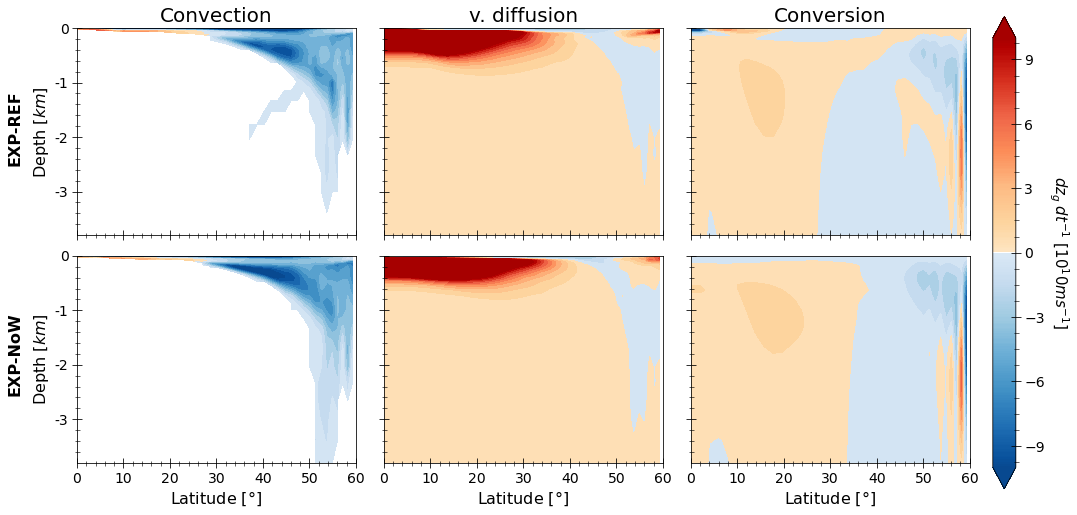

In [12]:
from matplotlib.cm import ScalarMappable

exp = list(ds.keys())[0]
phi = ds[exp].gphit[:,0]
lam = ds[exp].glamt[0,:]
depth = properties[exp].coords['Z']
YZ,ZY = np.meshgrid(phi.values,depth.values[:-1])
XY,YX = np.meshgrid(lam.values,phi.values)

fig,ax=plt.subplots(2,3,figsize=(16,8))

for i, exp in enumerate(ds):
    magn = 1e10
    KN2_convective = grid_ops[exp].average( 1/(9.81)*KN2_h_bot_to_top_convective[exp]*magn,'X').compute()  
    KN2_diffusive = grid_ops[exp].average( 1/(9.81)*KN2_h_bot_to_top_diffusive[exp]*magn,'X').compute()
    #Gh_hdiff = grid_ops[exp].average( 1/(9.81)*(GhT_hdiffusion_gm[exp]+GhS_hdiffusion_gm[exp])*magn,'X').compute()
    #Gh_qsr = grid_ops[exp].average( 1/(9.81)*(GhT_qsr3d[exp]).rolling({'t':2}).mean('t')*magn,'X').compute()
    C= grid_ops[exp].average((ds[exp].dzg_Kconvp2k).rolling({'t':2}).mean('t').rolling({'y_c':2}).mean('y_c')*1e9,'X').compute()

    # proc=grid_ops[exp].average(-KN2_h_w[exp]*1e9,'X').mean('t')
    # cont_C=grid_ops[exp].average(-KN2_h_w_avt[exp]*1e9,'X').mean('t')
    # cont_D=grid_ops[exp].average(-KN2_h_w_avt_inv[exp]*1e9,'X').mean('t')
    
    # cticks=np.linspace(-10,10,21)
    # c1=ax[i,0].contourf(YZ,ZY,proc[:-1],cmap=cmap_OB,extend='both',levels=cticks)
    # c2=ax[i,1].contourf(YZ,ZY,cont_C[:-1],cmap=cmap_OB,extend='both',levels=cticks)
    # c3=ax[i,2].contourf(YZ,ZY,cont_D[:-1],cmap=cmap_OB,extend='both',levels=cticks)

    cticks=np.linspace(-10,10,21)
    c1=ax[i,0].contourf(YZ,ZY,(-KN2_convective).mean('t')[:-1],cmap=cmap_OB,extend='both',levels=cticks)
    c2=ax[i,1].contourf(YZ,ZY,(-KN2_diffusive).mean('t')[:-1],cmap=cmap_OB,extend='both',levels=cticks)
    #c3=ax[i,2].contourf(YZ,ZY,(Gh_hdiff).mean('t')[:-1],cmap=cmap_OB,extend='both',levels=cticks)
    c4=ax[i,2].contourf(YZ,ZY,(C).mean('t')[:-1],cmap=cmap_OB,extend='both',levels=cticks)

    for j in range(3):
        ax[i,j].set_yticks([-4000,-3000,-2000,-1000,0])
        ax[i,j].set_yticklabels([0,-1,-2,-3,-4][::-1])
        ax[i,j].set_xlim(0,60)
        ax[i,j].set_ylim(-3800,0)
        ax[0,j].set_xticklabels([])        
        ax[1,j].set_xlabel('Latitude $[°]$',fontsize=16)
        if j>0: ax[i,j].set_yticklabels([])
# plt.colorbar(c1,ax=ax[i,0])
# plt.colorbar(c2,ax=ax[i,1])
# plt.colorbar(c3,ax=ax[i,2])
    
ax_cb=fig.add_axes([0.92, 0.08, 0.02, 0.82])
cbar=plt.colorbar(ScalarMappable(norm=c1.norm, cmap=c1.cmap),ax=ax_cb,cax=ax_cb,
            ticks=np.arange(-9, 10, 3),
            extend='both', pad=0.02)
cbar.set_label(r'$dz_g\;dt^{-1}$ [$10^10m s^{-1}$]',rotation=-90,labelpad=25,fontsize=15)
ax[0,0].set_title("Convection")
ax[0,1].set_title("v. diffusion")
ax[0,2].set_title("Conversion")
ax[0,0].set_ylabel('Depth $[km]$',fontsize=16)
ax[1,0].set_ylabel('Depth $[km]$',fontsize=16)

ax[0,0].annotate('EXP-REF',[-0.25,0.35],xycoords='axes fraction',
                 fontweight='bold',fontsize=16,rotation=90)
ax[1,0].annotate('EXP-NoW',[-0.25,0.34],
                 fontweight='bold',xycoords='axes fraction',fontsize=16,rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('figures/Fig8_analysis_tendencies_contours.png', transparent=True, dpi=300)

# ax[i,0].set_title("KN$_h^2$ - Total (1e-10)")
# ax[i,1].set_title("KN$_h^2$ - Convective (1e-9)")
# ax[i,2].set_title("KN$_h^2$ - Diffusive (1e-10)")
#plt.contour(YZ,ZY,cont_C[:-1],extend='both',levels=[-10,0,10],colors='k',alpha=.5,linewidths=1)
#plt.contour(YZ,ZY,cont_D[:-1],extend='both',levels=[-10,0,10],colors='g',alpha=.5,linewidths=1)

<Figure size 864x576 with 0 Axes>

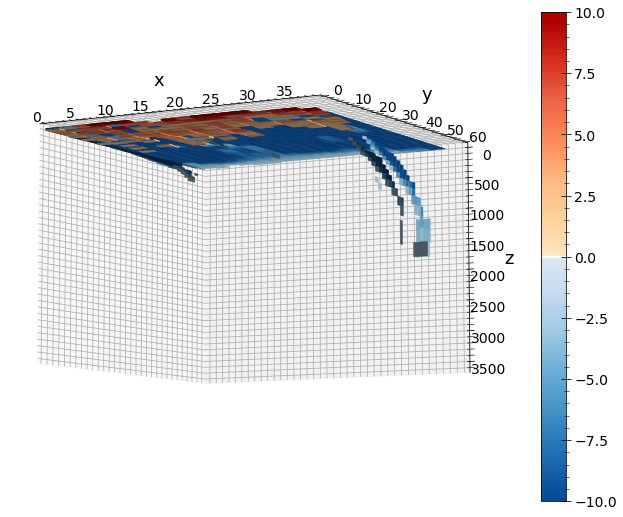

In [13]:
import matplotlib 
norm=matplotlib.colors.Normalize(vmin=-10,vmax=10)
scalarMap = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap_OB)

def get_rgb3d(proc):
    colors=np.zeros(proc.shape+(4,))#proc.copy().expand_dims('c':).values
    for i in range(colors.shape[0]):
        colors[i]=scalarMap.to_rgba(proc[i])
    return colors

fig=plt.figure(figsize=(12,8))
ax = plt.figure().add_subplot(projection='3d')

x3d=ds['EXP00_5d50'].glamu.expand_dims({'z_c':ds['EXP00_5d50'].z_c})
y3d=ds['EXP00_5d50'].gphiv.expand_dims({'z_c':ds['EXP00_5d50'].z_c})
#z3d=ds.gdepw_0
z3d=ds['EXP00_5d50'].gdept_0

proc = (-KN2_h_w_avt['EXP00_5d50']*1e9).mean('t')
proc_threshold = np.logical_or(proc<-2,proc>2)
colors=get_rgb3d(proc.where(proc_threshold))
proc_plot=proc#.where(proc_threshold)
ax.voxels(x3d, y3d, z3d, proc_plot[1:,1:,1:],
          facecolors=colors[1:,1:,1:],
          edgecolors=colors[1:,1:,1:],  # brighter
          linewidth=0.5)
ax.set(xlabel='x', ylabel='y', zlabel='z',zlim3d=(3600,0),xlim3d=(0,38),ylim3d=(0,60))

ax.view_init(-7,-60)
plt.colorbar(scalarMap,ax=ax)

<Figure size 864x576 with 0 Axes>

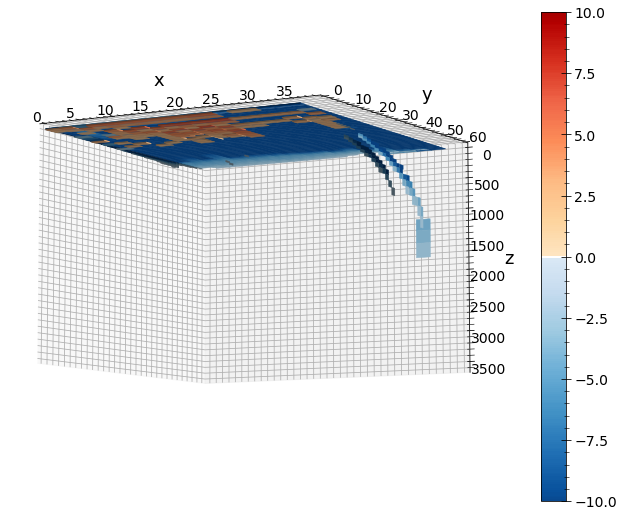

In [14]:
import matplotlib 
norm=matplotlib.colors.Normalize(vmin=-10,vmax=10)
scalarMap = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap_OB)

def get_rgb3d(proc):
    colors=np.zeros(proc.shape+(4,))#proc.copy().expand_dims('c':).values
    for i in range(colors.shape[0]):
        colors[i]=scalarMap.to_rgba(proc[i])
    return colors

fig=plt.figure(figsize=(12,8))
ax = plt.figure().add_subplot(projection='3d')

x3d=ds['EXP00_5d50'].glamu.expand_dims({'z_c':ds['EXP00_5d50'].z_c})
y3d=ds['EXP00_5d50'].gphiv.expand_dims({'z_c':ds['EXP00_5d50'].z_c})
#z3d=ds.gdepw_0
z3d=ds['EXP00_5d50'].gdept_0

proc = (-KN2_h_w_avt['EXP01_5d50']*1e9).mean('t')
proc_threshold = np.logical_or(proc<-2,proc>2)
colors=get_rgb3d(proc.where(proc_threshold))
proc_plot=proc#.where(proc_threshold)
ax.voxels(x3d, y3d, z3d, proc_plot[1:,1:,1:],
          facecolors=colors[1:,1:,1:],
          edgecolors=colors[1:,1:,1:],  # brighter
          linewidth=0.5)
ax.set(xlabel='x', ylabel='y', zlabel='z',zlim3d=(3600,0),xlim3d=(0,38),ylim3d=(0,60))

ax.view_init(-7,-60)
plt.colorbar(scalarMap,ax=ax)

## Process contribution

In [7]:
for var in ds['EXP00_5d50']: print(var) if 'dzg' in var else None

dzg_tot
dzg_Ttot
dzg_Txad
dzg_Tyad
dzg_Tzad
dzg_Tldf
dzg_Tzdf
dzg_Tqns
dzg_Tqsr
dzg_Tatf
dzg_Stot
dzg_Sxad
dzg_Syad
dzg_Szad
dzg_Sldf
dzg_Szdf
dzg_Scdt
dzg_Satf
dzg_Kconvp2k


In [7]:
processComb = {exp: {'Mixing': ds[exp].dzg_Tzdf+ds[exp].dzg_Szdf+ds[exp].dzg_Tldf+ds[exp].dzg_Sldf,
                     'Conversion': ds[exp].dzg_Kconvp2k,
                     'KN2': KN2_h_w_avt[exp],
                     'KN2_inv': KN2_h_w_avt_inv[exp]} 
                     for exp in ds}
#processCombGM = {exp: {var: properties[exp].global_mean(processComb[exp][var], Vmask=ds[exp].mask_bd_t).compute() for var in processComb[exp]} for exp in ds}

In [8]:
properties['EXP00_5d50'].global_mean(processComb['EXP00_5d50']['KN2'], Vmask=ds['EXP00_5d50'].mask_bd_t).compute()

: 

: 

In [ ]:
processCombGM_smooth = {exp: {var: processCombGM[exp][var].rolling({'t':72}).mean('t').compute() for var in processCombGM[exp]} for exp in ds}

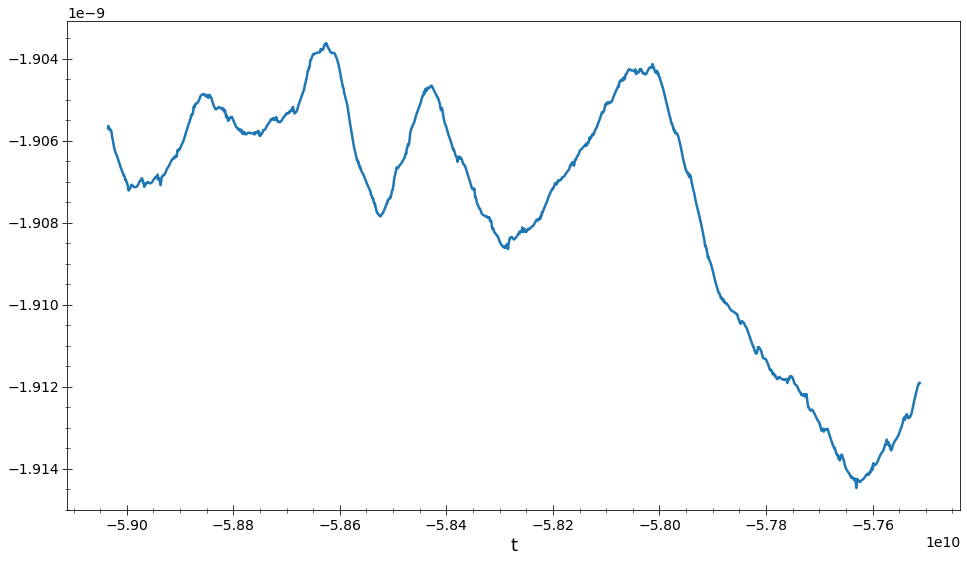

In [ ]:
#processCombGM_smooth['EXP00_5d50']['KN2'].plot()
processCombGM_smooth['EXP00_5d50']['KN2_inv'].plot()

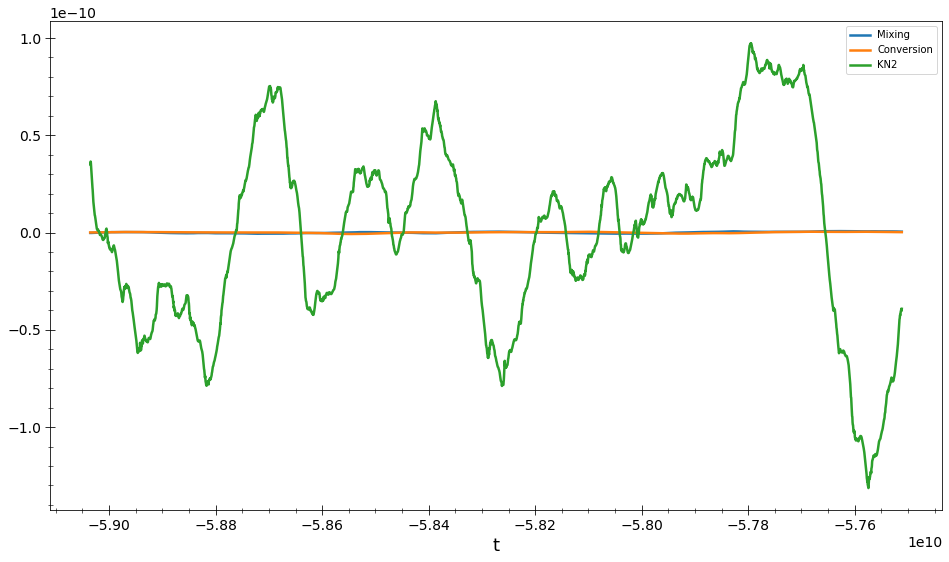

In [ ]:
for var in processCombGM_smooth['EXP00_5d50']:
    (processCombGM_smooth['EXP00_5d50'][var]-processCombGM_smooth['EXP00_5d50'][var].mean('t')).plot(label=var)
plt.legend()
#(zdf_cont['EXP01_5d50']-zdf_cont['EXP01_5d50'].mean('t')).plot()
#properties['EXP00_5d50'].global_mean(ds['EXP00_5d50'].dzg_Tzdf).plot()

In [41]:
from statsmodels.nonparametric.smoothers_lowess import lowess
dmoc = {exp: np.transpose(lowess(ds[exp].psi_dmoc, ds[exp].t,frac=0.05))[1] for exp in ds}

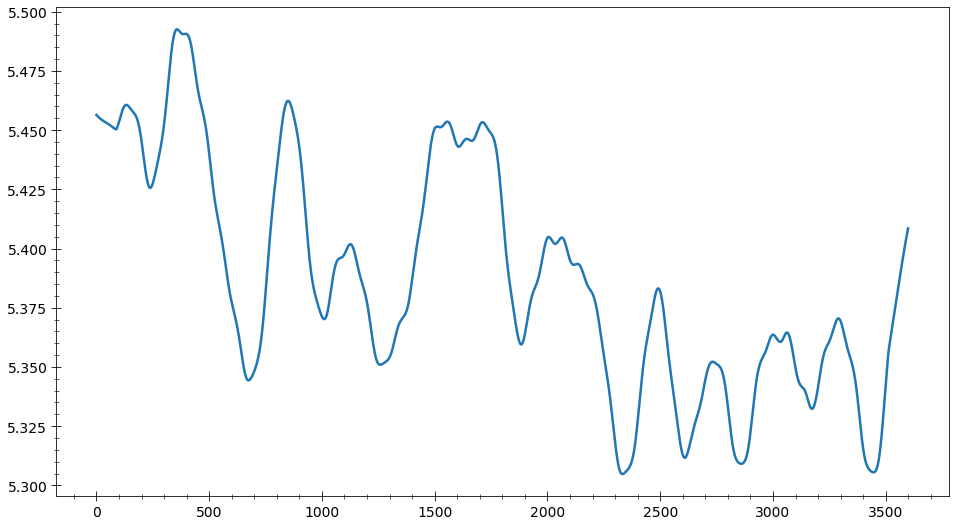

In [44]:
plt.plot(dmoc['EXP00_5d50'])